In [1]:
from azureml import Workspace
ws = Workspace()
experiment = ws.experiments['ca38ca386b7346208f1b4701dfefe90e.f-id.df78e45d89a1484c839dfb43b8352eed']
ds = experiment.get_intermediate_dataset(
    node_id='c04357ba-d84b-49e7-9f0d-f8f519d70ab5-17101',
    port_name='Results dataset',
    data_type_id='GenericCSV'
)
frame = ds.to_dataframe()

In [2]:
def diabetes_hist(df):
    import numpy as np
    import matplotlib.pyplot as plt
    admitted_mask = df['readmitted'] == 'YES'
    not_admitted_mask = df['readmitted'] == 'NO'
    for col in df.columns.tolist():
        if df[col].dtype in [np.int64, np.int32, np.float64]:
            admitted = df.ix[admitted_mask, col]
            not_admitted = df.ix[not_admitted_mask, col]            
            
            fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))
            ax[0].hist(admitted.as_matrix(), bins = 30)
            ax[0].set_title('Histogram of ' + col + '\n for readmitted patients')
            ax[1].hist(not_admitted.as_matrix(), bins = 30)
            ax[1].set_title('Histogram of ' + col + '\n for not readmitted patients')            
            

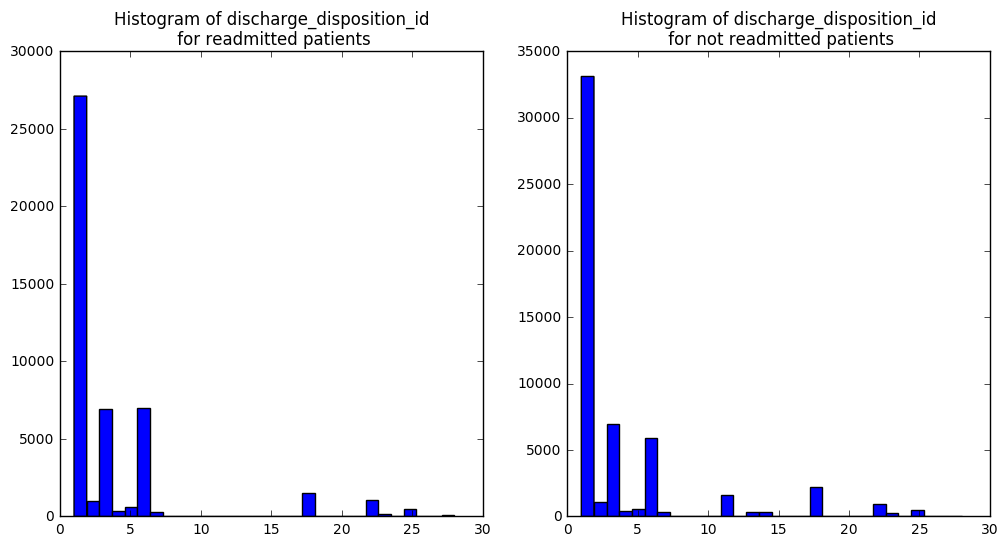

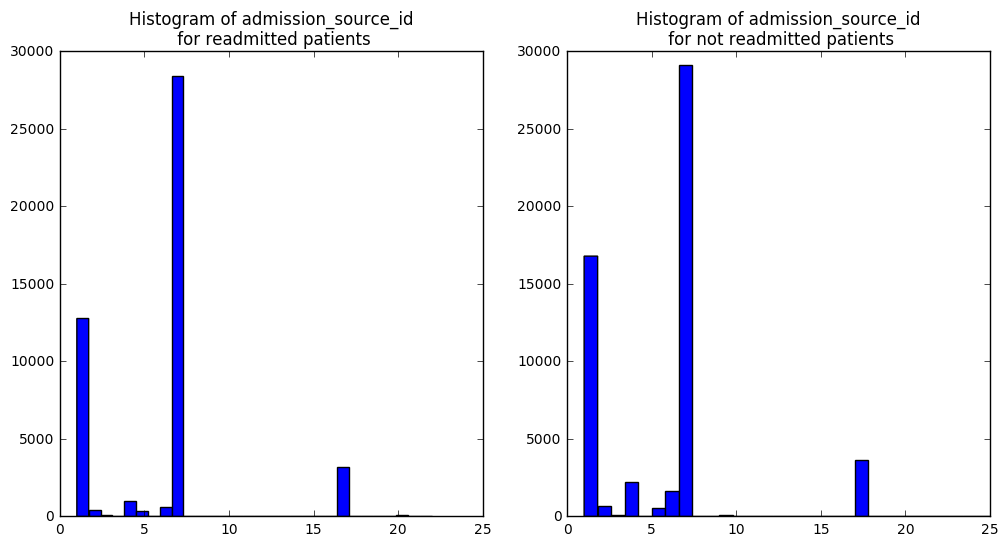

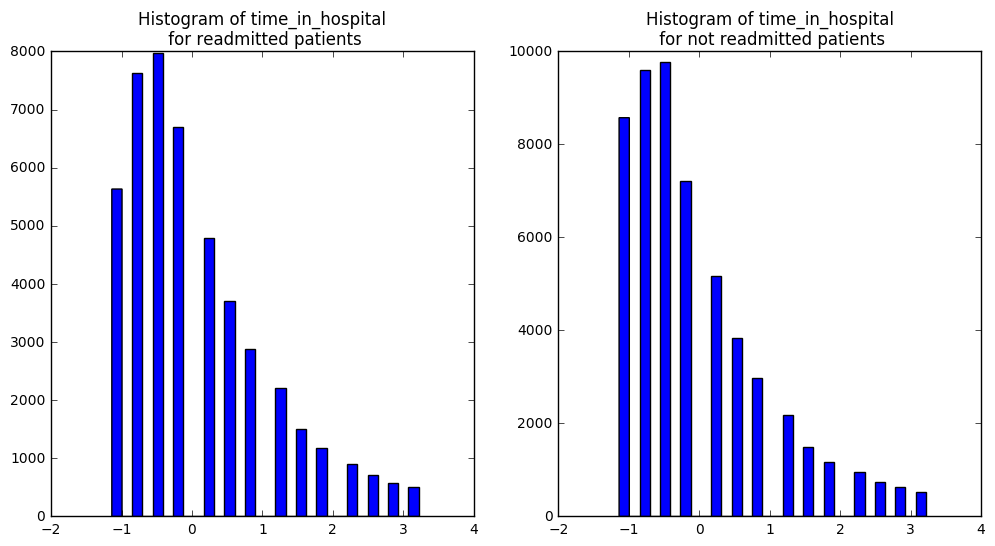

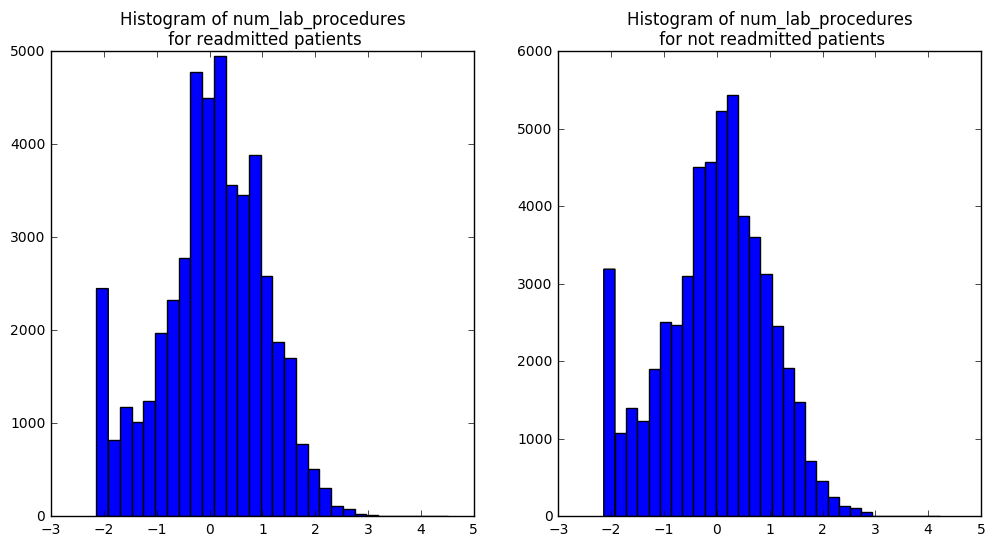

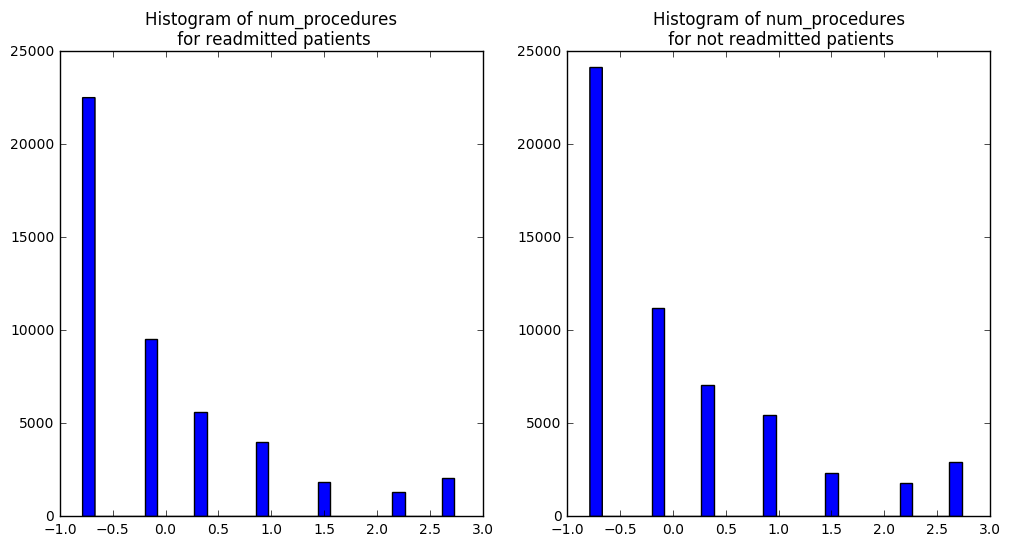

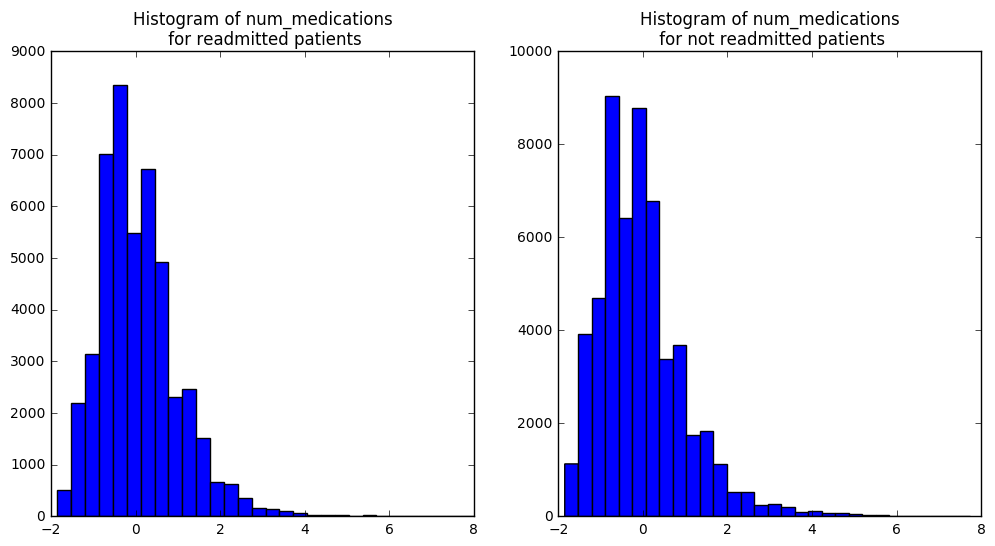

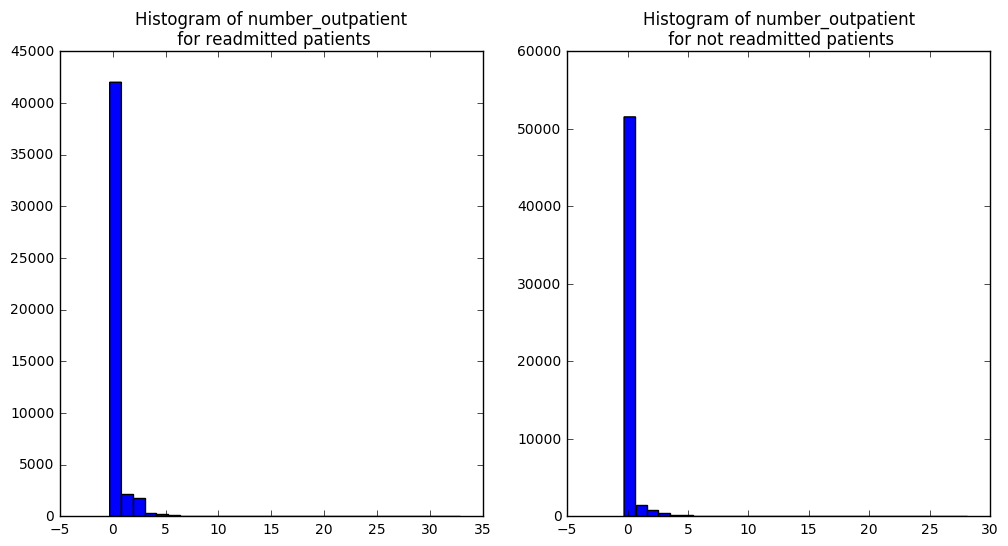

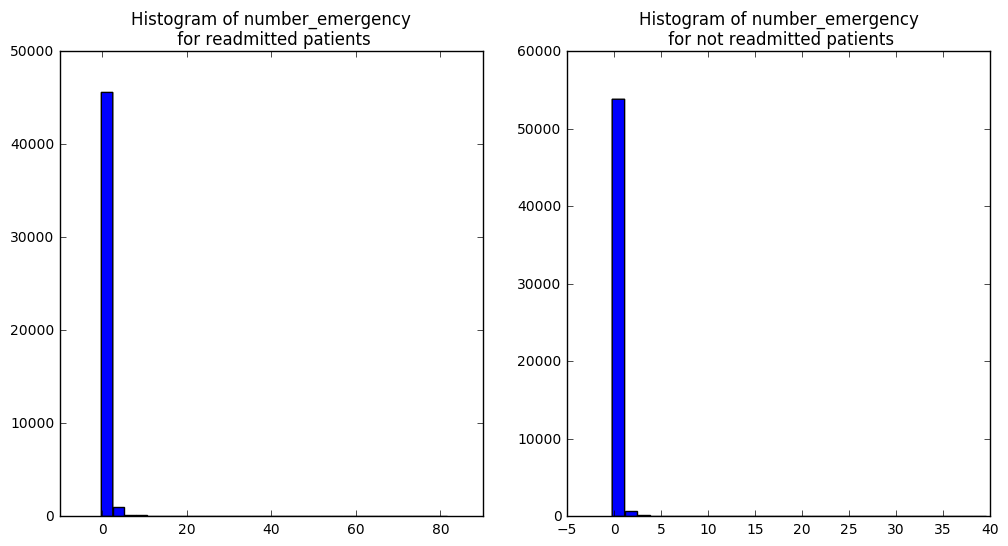

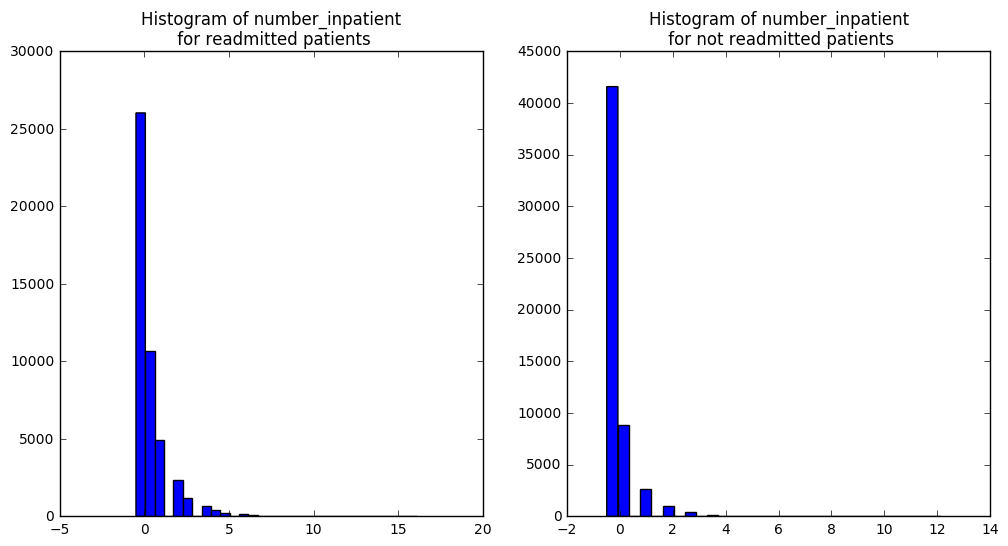

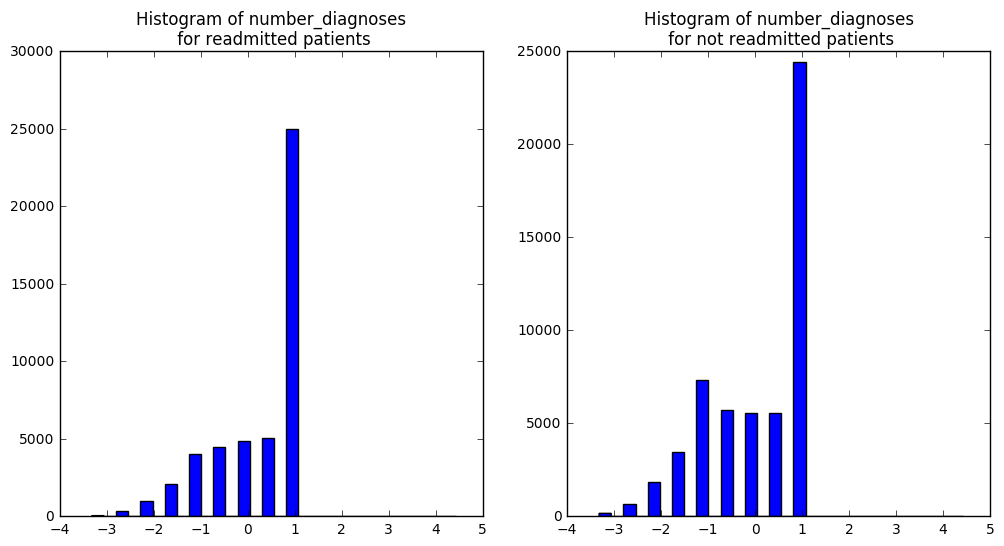

In [3]:
%matplotlib inline
diabetes_hist(frame)

In [4]:
def diabetes_box(df):
    import numpy as np
    import matplotlib.pyplot as plt
    readmitted_mask = df['readmitted'] == 'YES'
    not_admitted_mask = df['readmitted'] == 'NO'
    
    for col in df.columns.tolist():
        if df[col].dtype in [np.int64, np.int32, np.float64]:
            readmitted = df.ix[readmitted_mask, col]
            not_admitted = df.ix[not_admitted_mask, col] 
            
            fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))
            ax1.boxplot(readmitted.as_matrix());            
            ax2.boxplot(not_admitted.as_matrix());
            ax1.set_title('Boxplot of ' + col + '\n for readmitted patients')
            ax2.set_title('Boxplot of ' + col + '\n for not readmitted patients')

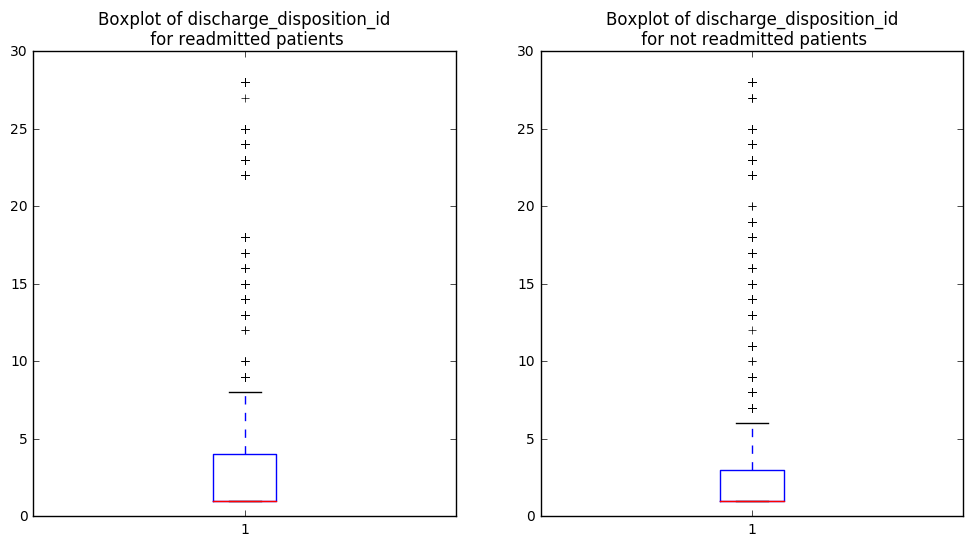

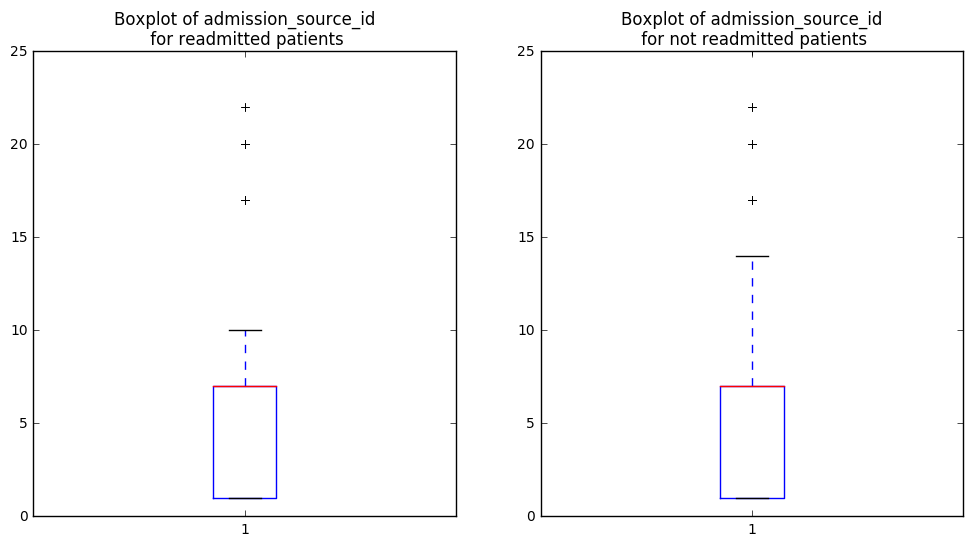

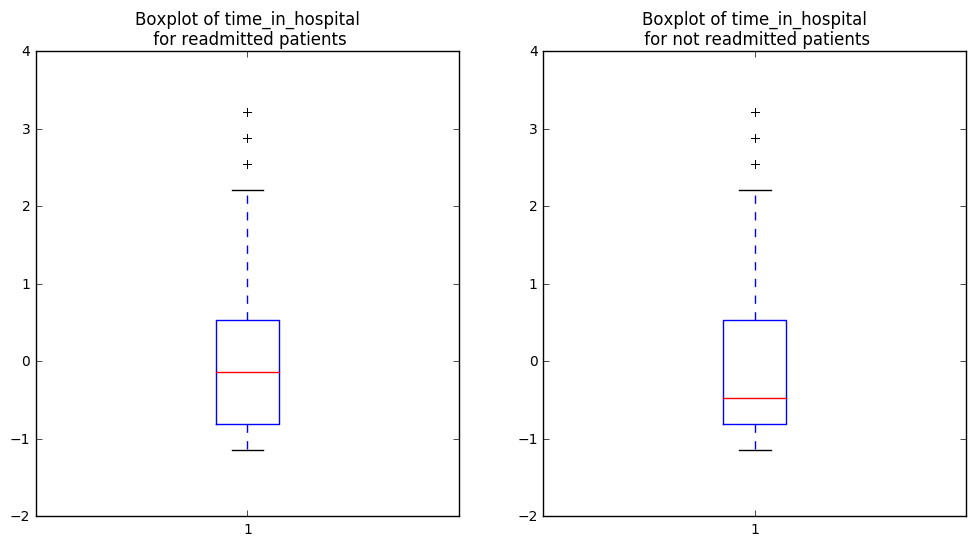

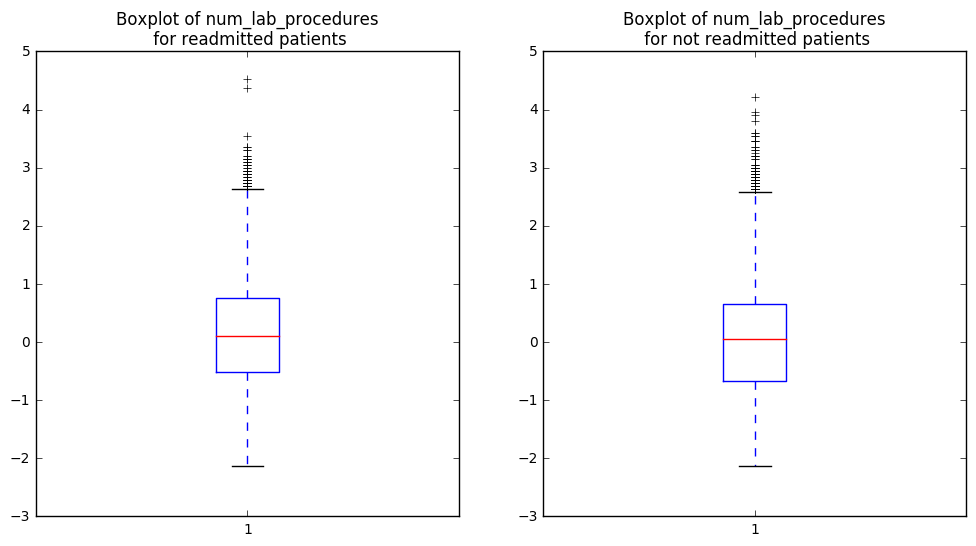

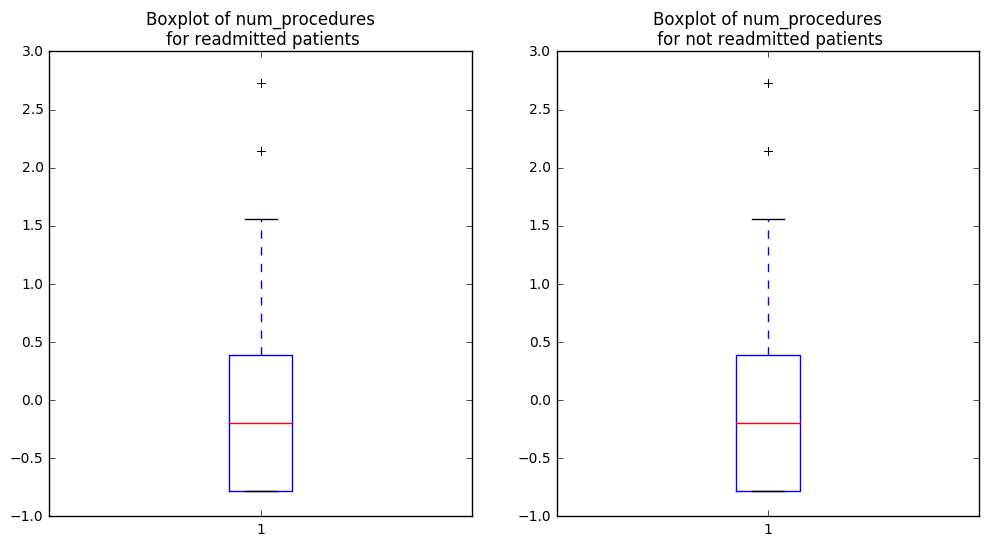

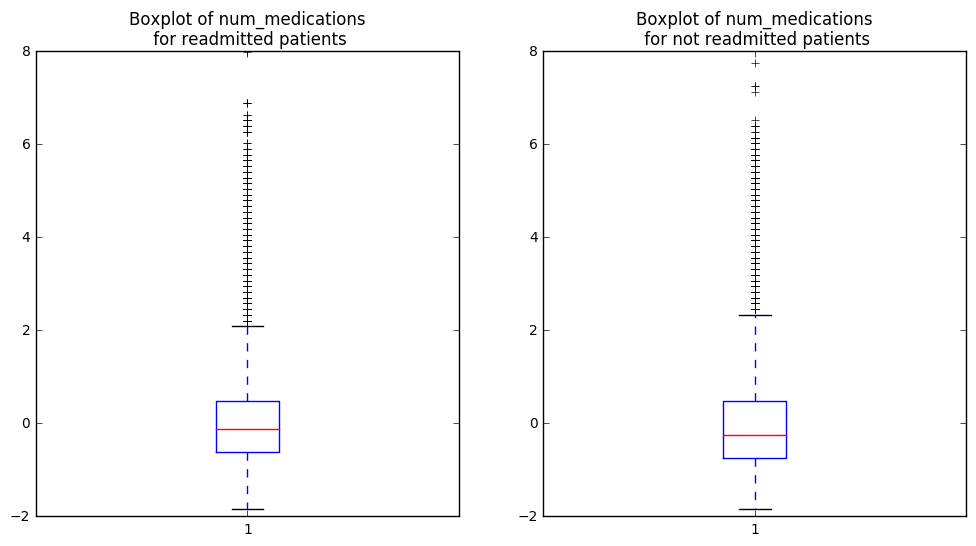

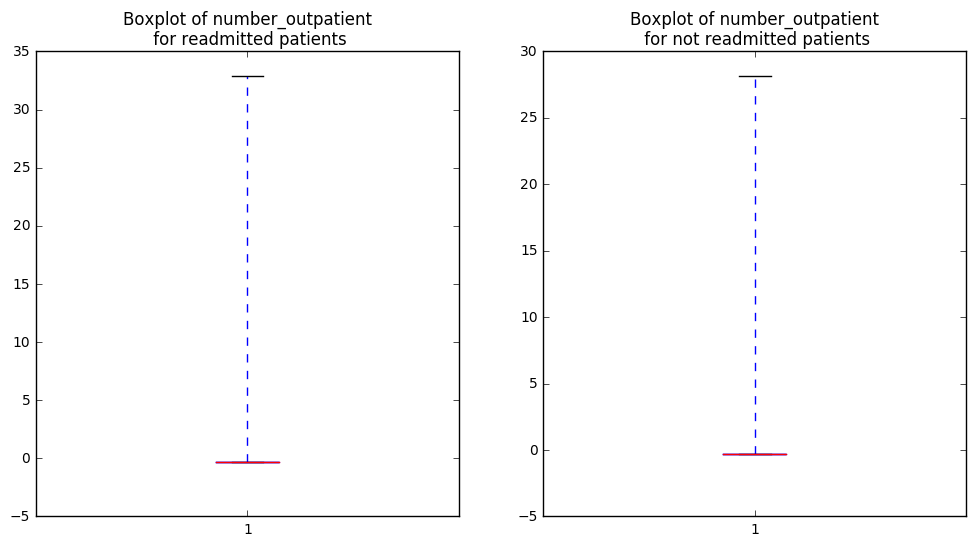

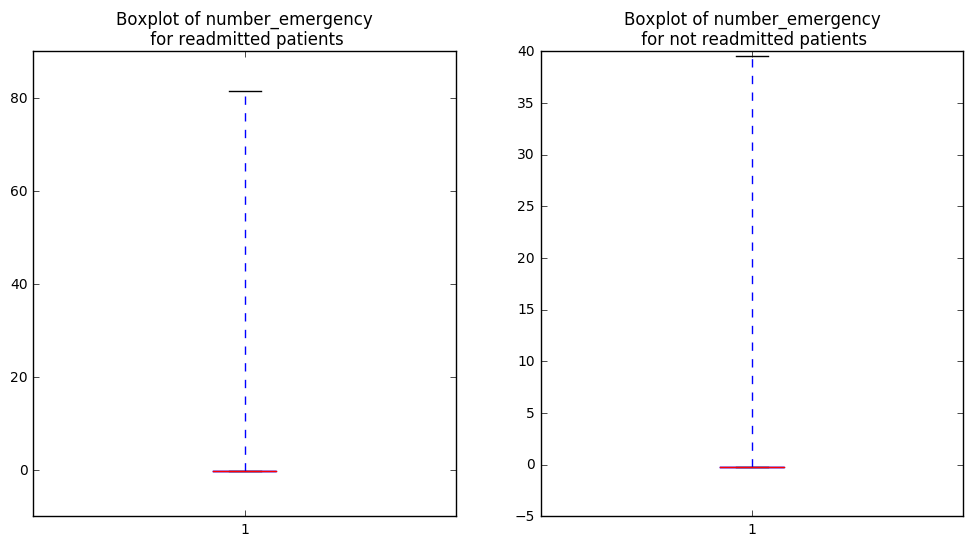

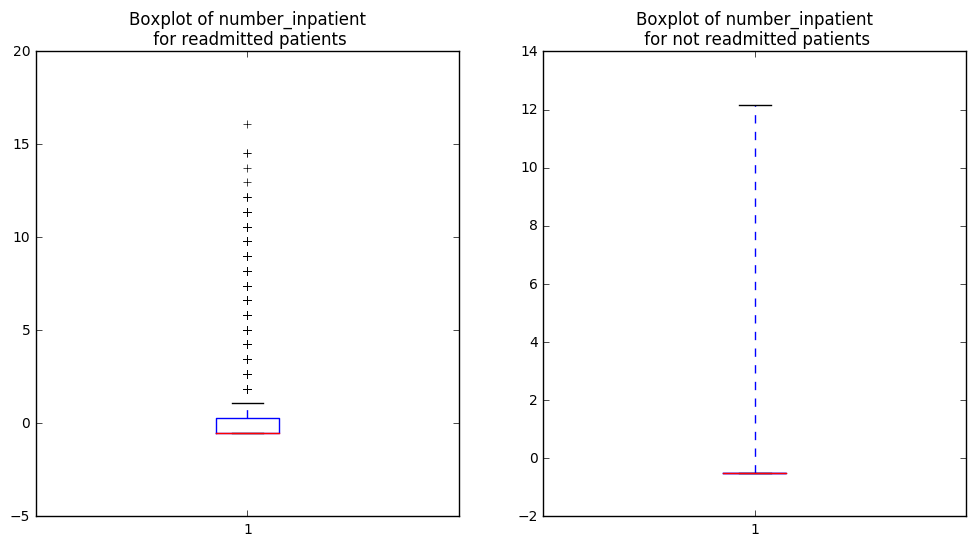

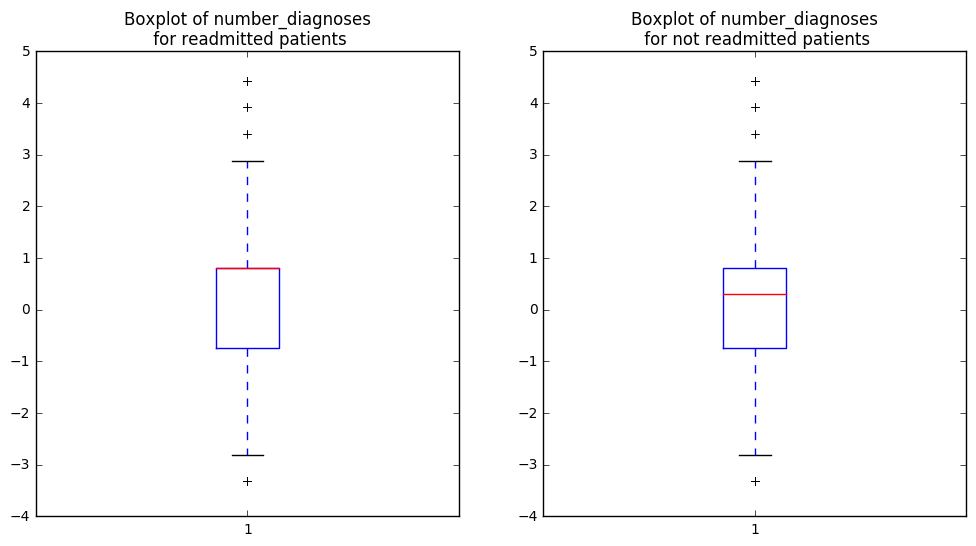

In [5]:
diabetes_box(frame)

In [ ]:
def diabetes_bar(df):
    import numpy as np
    import matplotlib.pyplot as plt
    readmitted_mask = df['readmitted'] == 'YES'
    not_admitted_mask = df['readmitted'] == 'NO'
    
    for col in df.columns.tolist():
        if df[col].dtype in [np.int64, np.int32, np.float64]:
            readmitted = df.ix[readmitted_mask, col]
            not_readmitted = df.ix[not_admitted_mask, col]
            
            fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))
            readmitted.plot(kind = 'bar', ax = ax1)
            ax1.set_title('Bar chart of ' + col + '\n for readmitted patients')
            not_readmitted.plot(kind = 'bar', ax = ax2)
            ax1.set_title('Bar chart of ' + col + '\n for readmitted patients')

In [ ]:
diabetes_bar(frame)